### <font color='red'> You need to download the MNIST dataset from https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy
import Network as NN
import mnist_loader

## 1.1 Create and Train Network

In [2]:
# Read in 2000 MNIST samples
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0][:1000])
train_class = np.array(train[1][:1000])

<IPython.core.display.Javascript object>


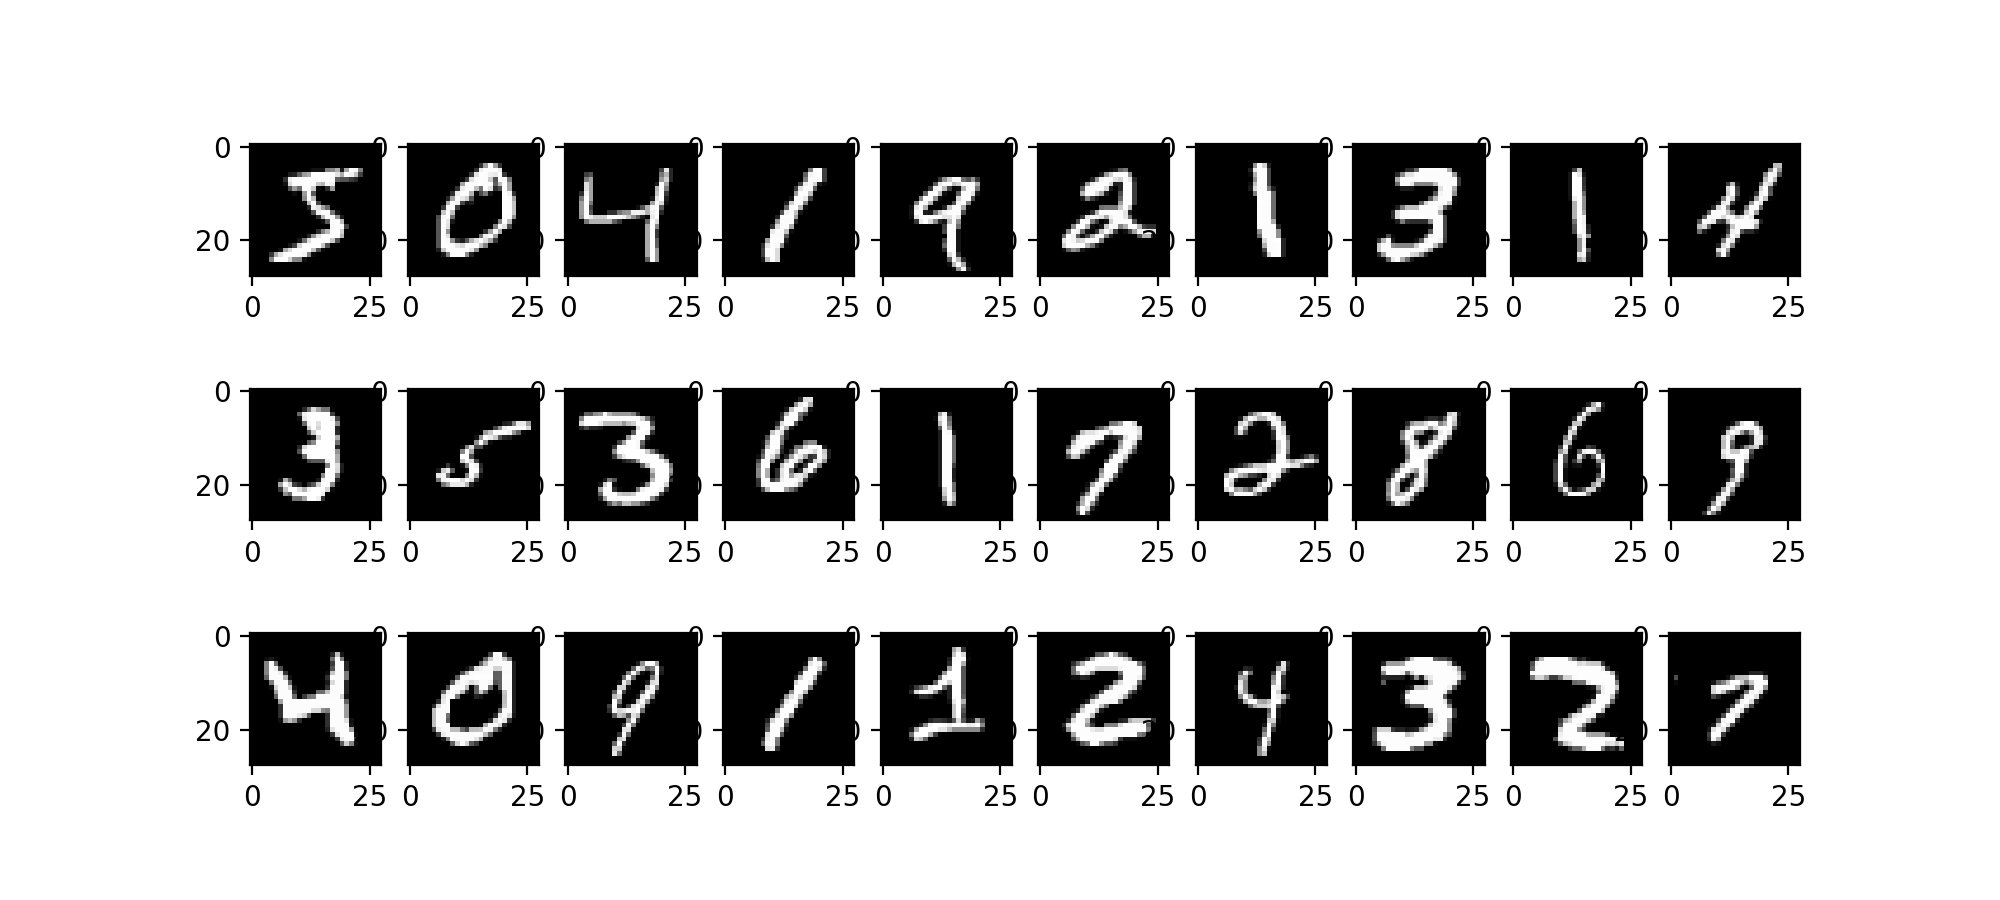

In [3]:
# Data Visualization
def show(data, image_per_row = 10):
    cnt = len(data)         # total number of images showing
    row_cnt = cnt / image_per_row  # show 10 images per row
    
    plt.figure(figsize=(image_per_row, 1.5 * row_cnt))
    
    for index, image in enumerate(data):
        plt.subplot(row_cnt, image_per_row, index + 1)
        plt.imshow(image.reshape([28, 28]), cmap=plt.cm.gray)
        
show(train_in[:30])

########## lrate=0.15 ##########
Epoch 0: cost [0, 26.01180730776442]
Epoch 1: cost [1, 26.10558275096923]
Epoch 2: cost [2, 26.097260798342827]
Epoch 3: cost [3, 25.870315652537908]
Epoch 4: cost [4, 25.989760697332382]
Epoch 5: cost [5, 26.102084857483568]
Epoch 6: cost [6, 25.9232251301278]
Epoch 7: cost [7, 26.008057865089064]
Epoch 8: cost [8, 25.971992438190384]
Epoch 9: cost [9, 25.944518163753656]
Epoch 10: cost [10, 26.09936189972359]
Epoch 11: cost [11, 25.94939551756102]
Epoch 12: cost [12, 25.956826966873493]
Epoch 13: cost [13, 26.05643084583003]
Epoch 14: cost [14, 25.93648018894678]
Epoch 15: cost [15, 26.12605132391167]
Epoch 16: cost [16, 25.881651709696644]
Epoch 17: cost [17, 26.031419775340066]
Epoch 18: cost [18, 25.96811312040667]
Epoch 19: cost [19, 26.21510165708955]
Epoch 20: cost [20, 26.02951411061635]
Epoch 21: cost [21, 26.09104735533793]
Epoch 22: cost [22, 26.05841235215885]
Epoch 23: cost [23, 26.173641742164968]
Epoch 24: cost [24, 25.984149471377826]
E

Epoch 203: cost [203, 13.382495036336298]
Epoch 204: cost [204, 13.058444818676747]
Epoch 205: cost [205, 12.863437333730701]
Epoch 206: cost [206, 13.103238284890402]
Epoch 207: cost [207, 13.804779157656395]
Epoch 208: cost [208, 13.85528739395693]
Epoch 209: cost [209, 13.251201481733075]
Epoch 210: cost [210, 13.243292034493395]
Epoch 211: cost [211, 13.33004134677712]
Epoch 212: cost [212, 13.35808414869249]
Epoch 213: cost [213, 12.906133665171426]
Epoch 214: cost [214, 12.832195264125728]
Epoch 215: cost [215, 12.807754956095772]
Epoch 216: cost [216, 13.972219635446923]
Epoch 217: cost [217, 13.084854111355728]
Epoch 218: cost [218, 12.61640266937907]
Epoch 219: cost [219, 12.915105412467533]
Epoch 220: cost [220, 13.272461485208478]
Epoch 221: cost [221, 12.960459252859208]
Epoch 222: cost [222, 12.755313109369895]
Epoch 223: cost [223, 13.194418675340437]
Epoch 224: cost [224, 13.568379073792727]
Epoch 225: cost [225, 12.758804370968255]
Epoch 226: cost [226, 13.6618884215850

Epoch 399: cost [399, 11.452323833333722]
Epoch 400: cost [400, 11.459150535930355]
Epoch 401: cost [401, 11.445844124827785]
Epoch 402: cost [402, 11.521463065420674]
Epoch 403: cost [403, 11.747637634712147]
Epoch 404: cost [404, 11.546307973237566]
Epoch 405: cost [405, 11.520335568248427]
Epoch 406: cost [406, 11.489619674360533]
Epoch 407: cost [407, 11.296620549293335]
Epoch 408: cost [408, 12.079421732585844]
Epoch 409: cost [409, 11.242290789319107]
Epoch 410: cost [410, 11.988666987030104]
Epoch 411: cost [411, 11.566597919424588]
Epoch 412: cost [412, 11.297929840219846]
Epoch 413: cost [413, 11.485926183499897]
Epoch 414: cost [414, 11.301051208811808]
Epoch 415: cost [415, 12.769435641768828]
Epoch 416: cost [416, 11.303105479319575]
Epoch 417: cost [417, 11.750054626041239]
Epoch 418: cost [418, 11.455020512581699]
Epoch 419: cost [419, 12.021435591567233]
Epoch 420: cost [420, 11.490030150124962]
Epoch 421: cost [421, 11.816537990130538]
Epoch 422: cost [422, 11.241003031

Epoch 101: cost [101, 9.734541664451447]
Epoch 102: cost [102, 9.739514464213162]
Epoch 103: cost [103, 9.778197715374258]
Epoch 104: cost [104, 9.863630040413268]
Epoch 105: cost [105, 9.740841078794395]
Epoch 106: cost [106, 9.697298013575125]
Epoch 107: cost [107, 9.95733142218396]
Epoch 108: cost [108, 9.764360476052893]
Epoch 109: cost [109, 9.758885147526332]
Epoch 110: cost [110, 9.7620356237905]
Epoch 111: cost [111, 9.771168063912164]
Epoch 112: cost [112, 9.728519628573174]
Epoch 113: cost [113, 9.692876142663483]
Epoch 114: cost [114, 9.74914657677731]
Epoch 115: cost [115, 9.764717332524313]
Epoch 116: cost [116, 9.771905351501644]
Epoch 117: cost [117, 9.693274974926274]
Epoch 118: cost [118, 9.722123954534059]
Epoch 119: cost [119, 9.788657934530974]
Epoch 120: cost [120, 9.791572629942886]
Epoch 121: cost [121, 9.830144927251215]
Epoch 122: cost [122, 9.73258881361494]
Epoch 123: cost [123, 9.724291331190752]
Epoch 124: cost [124, 9.663640279486918]
Epoch 125: cost [125,

Epoch 303: cost [303, 9.576071208015453]
Epoch 304: cost [304, 9.460845223765556]
Epoch 305: cost [305, 9.451958524851742]
Epoch 306: cost [306, 9.66279400266514]
Epoch 307: cost [307, 9.334883390962052]
Epoch 308: cost [308, 9.324960769868294]
Epoch 309: cost [309, 9.768205562147749]
Epoch 310: cost [310, 9.50492177120886]
Epoch 311: cost [311, 9.314004385757539]
Epoch 312: cost [312, 9.588797906131056]
Epoch 313: cost [313, 9.346917877280031]
Epoch 314: cost [314, 9.648800957741484]
Epoch 315: cost [315, 9.320705821467161]
Epoch 316: cost [316, 9.481336178114228]
Epoch 317: cost [317, 9.329764087784428]
Epoch 318: cost [318, 9.394847400005993]
Epoch 319: cost [319, 9.583339981703556]
Epoch 320: cost [320, 9.537446107421509]
Epoch 321: cost [321, 9.261940282605869]
Epoch 322: cost [322, 9.536596608455229]
Epoch 323: cost [323, 9.220884902983517]
Epoch 324: cost [324, 9.322572890452166]
Epoch 325: cost [325, 9.324062537893061]
Epoch 326: cost [326, 9.28147653210026]
Epoch 327: cost [32

Epoch 505: cost [505, 9.766119319401001]
Epoch 506: cost [506, 9.126559673751293]
Epoch 507: cost [507, 9.138000944179337]
Epoch 508: cost [508, 9.445364616022166]
Epoch 509: cost [509, 9.003053905641796]
Epoch 510: cost [510, 9.080153106449297]
Epoch 511: cost [511, 9.326590346116735]
Epoch 512: cost [512, 9.366038968905466]
Epoch 513: cost [513, 9.011176777534185]
Epoch 514: cost [514, 9.185190960278453]
Epoch 515: cost [515, 8.946174763631417]
Epoch 516: cost [516, 8.937916172942352]
Epoch 517: cost [517, 9.525922734091132]
Epoch 518: cost [518, 9.018903348532902]
Epoch 519: cost [519, 9.03385426319916]
Epoch 520: cost [520, 9.053842805211845]
Epoch 521: cost [521, 9.420197940559039]
Epoch 522: cost [522, 9.951986308179888]
Epoch 523: cost [523, 9.579307900433196]
Epoch 524: cost [524, 10.368861192923857]
Epoch 525: cost [525, 9.093668239059932]
Epoch 526: cost [526, 9.368272786480732]
Epoch 527: cost [527, 9.312453012705438]
Epoch 528: cost [528, 9.257818218335137]
Epoch 529: cost 

Epoch 111: cost [111, 8.32519574681067]
Epoch 112: cost [112, 8.316892316737492]
Epoch 113: cost [113, 8.320983896586348]
Epoch 114: cost [114, 8.30214298779965]
Epoch 115: cost [115, 8.324047366435625]
Epoch 116: cost [116, 8.299871393887118]
Epoch 117: cost [117, 8.312640398386012]
Epoch 118: cost [118, 8.310290380564904]
Epoch 119: cost [119, 8.307417312889852]
Epoch 120: cost [120, 8.310037912015732]
Epoch 121: cost [121, 8.32343596928835]
Epoch 122: cost [122, 8.363338994823726]
Epoch 123: cost [123, 8.351969419430432]
Epoch 124: cost [124, 8.297862092021216]
Epoch 125: cost [125, 8.307184532114208]
Epoch 126: cost [126, 8.295089702249301]
Epoch 127: cost [127, 8.285846409347634]
Epoch 128: cost [128, 8.292052952447808]
Epoch 129: cost [129, 8.306304029770867]
Epoch 130: cost [130, 8.279502244499488]
Epoch 131: cost [131, 8.304171024740452]
Epoch 132: cost [132, 8.290203068709697]
Epoch 133: cost [133, 8.295195414152369]
Epoch 134: cost [134, 8.299839519194716]
Epoch 135: cost [13

Epoch 312: cost [312, 8.176264282037478]
Epoch 313: cost [313, 8.119701703103395]
Epoch 314: cost [314, 8.130832122831523]
Epoch 315: cost [315, 8.135549310155584]
Epoch 316: cost [316, 8.279267748132463]
Epoch 317: cost [317, 8.130971985480862]
Epoch 318: cost [318, 8.140223223367945]
Epoch 319: cost [319, 8.206854816623654]
Epoch 320: cost [320, 8.888422702341805]
Epoch 321: cost [321, 8.113753631398332]
Epoch 322: cost [322, 8.142788767815308]
Epoch 323: cost [323, 8.199643428412049]
Epoch 324: cost [324, 8.116270049723378]
Epoch 325: cost [325, 8.147563106226361]
Epoch 326: cost [326, 8.115575512039037]
Epoch 327: cost [327, 8.120688324394116]
Epoch 328: cost [328, 8.127441287960648]
Epoch 329: cost [329, 8.182411808357562]
Epoch 330: cost [330, 8.159820577215163]
Epoch 331: cost [331, 8.13145555798123]
Epoch 332: cost [332, 8.211644154328685]
Epoch 333: cost [333, 8.109236238462818]
Epoch 334: cost [334, 8.104364113591792]
Epoch 335: cost [335, 8.104578577725025]
Epoch 336: cost [

Epoch 514: cost [514, 7.988619704457558]
Epoch 515: cost [515, 7.985930666774072]
Epoch 516: cost [516, 8.069316520810597]
Epoch 517: cost [517, 7.965819652962443]
Epoch 518: cost [518, 8.028493622291457]
Epoch 519: cost [519, 8.030731815468634]
Epoch 520: cost [520, 8.084654997173638]
Epoch 521: cost [521, 8.009240998439996]
Epoch 522: cost [522, 7.9846840592353905]
Epoch 523: cost [523, 8.017971741687223]
Epoch 524: cost [524, 8.208973127209429]
Epoch 525: cost [525, 8.023393169093355]
Epoch 526: cost [526, 7.977035031899692]
Epoch 527: cost [527, 8.049509037032308]
Epoch 528: cost [528, 7.977781416096291]
Epoch 529: cost [529, 7.974028940601098]
Epoch 530: cost [530, 8.017911041930143]
Epoch 531: cost [531, 8.214097173119873]
Epoch 532: cost [532, 7.995848121750384]
Epoch 533: cost [533, 7.954724425923807]
Epoch 534: cost [534, 8.004390464930628]
Epoch 535: cost [535, 8.430376343459567]
Epoch 536: cost [536, 7.985688879241055]
Epoch 537: cost [537, 8.398722421369559]
Epoch 538: cost

Epoch 15: cost [15, 7.718033033470749]
Epoch 16: cost [16, 7.722127079050231]
Epoch 17: cost [17, 7.7150968643164575]
Epoch 18: cost [18, 7.710989595120552]
Epoch 19: cost [19, 7.713067016104533]
Epoch 20: cost [20, 7.711460911284796]
Epoch 21: cost [21, 7.713933141858253]
Epoch 22: cost [22, 7.7120895455828045]
Epoch 23: cost [23, 7.710996101087208]
Epoch 24: cost [24, 7.70806673728477]
Epoch 25: cost [25, 7.707617667142819]
Epoch 26: cost [26, 7.716171324754858]
Epoch 27: cost [27, 7.711021602378107]
Epoch 28: cost [28, 7.707621990262977]
Epoch 29: cost [29, 7.70294548270446]
Epoch 30: cost [30, 7.705337116416832]
Epoch 31: cost [31, 7.704043992626503]
Epoch 32: cost [32, 7.70122630457923]
Epoch 33: cost [33, 7.707615100631069]
Epoch 34: cost [34, 7.702043947107713]
Epoch 35: cost [35, 7.711200284327346]
Epoch 36: cost [36, 7.707843947122654]
Epoch 37: cost [37, 7.701073386791406]
Epoch 38: cost [38, 7.70648600953804]
Epoch 39: cost [39, 7.703239062013541]
Epoch 40: cost [40, 7.71397

Epoch 219: cost [219, 7.622340743669343]
Epoch 220: cost [220, 7.624263823488885]
Epoch 221: cost [221, 7.626926692245732]
Epoch 222: cost [222, 7.6186516999791465]
Epoch 223: cost [223, 7.620541144322199]
Epoch 224: cost [224, 7.624478402048781]
Epoch 225: cost [225, 7.622098937132191]
Epoch 226: cost [226, 7.628384736223576]
Epoch 227: cost [227, 7.62694785225397]
Epoch 228: cost [228, 7.625111302227677]
Epoch 229: cost [229, 7.624200316130577]
Epoch 230: cost [230, 7.6172907850507325]
Epoch 231: cost [231, 7.62139155669018]
Epoch 232: cost [232, 7.620802805815277]
Epoch 233: cost [233, 7.624943451401087]
Epoch 234: cost [234, 7.615828290499269]
Epoch 235: cost [235, 7.618044288908387]
Epoch 236: cost [236, 7.615649972050824]
Epoch 237: cost [237, 7.617505913003653]
Epoch 238: cost [238, 7.631284547515887]
Epoch 239: cost [239, 7.628138990181026]
Epoch 240: cost [240, 7.616223642591409]
Epoch 241: cost [241, 7.622055941327499]
Epoch 242: cost [242, 7.613970667024312]
Epoch 243: cost 

Epoch 419: cost [419, 7.553833601702778]
Epoch 420: cost [420, 7.561548326848232]
Epoch 421: cost [421, 7.546318185843451]
Epoch 422: cost [422, 7.5505280926803255]
Epoch 423: cost [423, 7.551447675193613]
Epoch 424: cost [424, 7.5468794243408235]
Epoch 425: cost [425, 7.54993702814661]
Epoch 426: cost [426, 7.557471886735918]
Epoch 427: cost [427, 7.546751955066253]
Epoch 428: cost [428, 7.5446503627794534]
Epoch 429: cost [429, 7.550157133276582]
Epoch 430: cost [430, 7.549955125464118]
Epoch 431: cost [431, 7.546469267340768]
Epoch 432: cost [432, 7.547475490835124]
Epoch 433: cost [433, 7.549637418816807]
Epoch 434: cost [434, 7.548175144698591]
Epoch 435: cost [435, 7.551958167227302]
Epoch 436: cost [436, 7.562017754023451]
Epoch 437: cost [437, 7.549019747599386]
Epoch 438: cost [438, 7.555011597199512]
Epoch 439: cost [439, 7.543117088219384]
Epoch 440: cost [440, 7.5414057049950625]
Epoch 441: cost [441, 7.548132336097333]
Epoch 442: cost [442, 7.550829638236942]
Epoch 443: co

Epoch 619: cost [619, 7.48955099511838]
Epoch 620: cost [620, 7.482787228846485]
Epoch 621: cost [621, 7.4819103079738225]
Epoch 622: cost [622, 7.493415306773614]
Epoch 623: cost [623, 7.485241445584135]
Epoch 624: cost [624, 7.487340454335646]
Epoch 625: cost [625, 7.489619282739553]
Epoch 626: cost [626, 7.48083749243409]
Epoch 627: cost [627, 7.486283803976083]
Epoch 628: cost [628, 7.478667081839087]
Epoch 629: cost [629, 7.481727446638317]
Epoch 630: cost [630, 7.4824982765732875]
Epoch 631: cost [631, 7.480107632793731]
Epoch 632: cost [632, 7.477980998004907]
Epoch 633: cost [633, 7.487370315672557]
Epoch 634: cost [634, 7.476777699812795]
Epoch 635: cost [635, 7.476887743939697]
Epoch 636: cost [636, 7.469681251268148]
Epoch 637: cost [637, 7.471050659010554]
Epoch 638: cost [638, 7.500095422287707]
Epoch 639: cost [639, 7.4808858235427405]
Epoch 640: cost [640, 7.490354612270623]
Epoch 641: cost [641, 7.488937649115467]
Epoch 642: cost [642, 7.480640905706623]
Epoch 643: cost

Epoch 20: cost [20, 7.395091228817974]
Epoch 21: cost [21, 7.393863775697342]
Epoch 22: cost [22, 7.394795316704022]
Epoch 23: cost [23, 7.394532320027041]
Epoch 24: cost [24, 7.394049882881946]
Epoch 25: cost [25, 7.395516436959808]
Epoch 26: cost [26, 7.394362970034409]
Epoch 27: cost [27, 7.391871441426385]
Epoch 28: cost [28, 7.392602356165348]
Epoch 29: cost [29, 7.392731980539002]
Epoch 30: cost [30, 7.391001484207427]
Epoch 31: cost [31, 7.3912148731552145]
Epoch 32: cost [32, 7.39487226856786]
Epoch 33: cost [33, 7.3895118030761715]
Epoch 34: cost [34, 7.396209750264508]
Epoch 35: cost [35, 7.391898430884537]
Epoch 36: cost [36, 7.39455114617209]
Epoch 37: cost [37, 7.3936945912414656]
Epoch 38: cost [38, 7.393047002368526]
Epoch 39: cost [39, 7.39113006907601]
Epoch 40: cost [40, 7.39108297875845]
Epoch 41: cost [41, 7.391747551141561]
Epoch 42: cost [42, 7.392680777384369]
Epoch 43: cost [43, 7.38959689014601]
Epoch 44: cost [44, 7.391851759199057]
Epoch 45: cost [45, 7.38960

Epoch 224: cost [224, 7.35929816629435]
Epoch 225: cost [225, 7.360827455691146]
Epoch 226: cost [226, 7.360124911474945]
Epoch 227: cost [227, 7.3612887016764645]
Epoch 228: cost [228, 7.358080942665101]
Epoch 229: cost [229, 7.3581536427625815]
Epoch 230: cost [230, 7.358736517779481]
Epoch 231: cost [231, 7.358416198428011]
Epoch 232: cost [232, 7.360270861834156]
Epoch 233: cost [233, 7.359184594056836]
Epoch 234: cost [234, 7.357441900402597]
Epoch 235: cost [235, 7.359259370288297]
Epoch 236: cost [236, 7.35740694843786]
Epoch 237: cost [237, 7.358880603165363]
Epoch 238: cost [238, 7.359636765016313]
Epoch 239: cost [239, 7.358303265704087]
Epoch 240: cost [240, 7.359592182030693]
Epoch 241: cost [241, 7.359706313792948]
Epoch 242: cost [242, 7.358358245374585]
Epoch 243: cost [243, 7.36011777685365]
Epoch 244: cost [244, 7.356515950638875]
Epoch 245: cost [245, 7.358637330072441]
Epoch 246: cost [246, 7.356376330278139]
Epoch 247: cost [247, 7.355821825221544]
Epoch 248: cost [

Epoch 425: cost [425, 7.329779139178273]
Epoch 426: cost [426, 7.33178785660966]
Epoch 427: cost [427, 7.3268573136944894]
Epoch 428: cost [428, 7.3302612680734915]
Epoch 429: cost [429, 7.331448613153006]
Epoch 430: cost [430, 7.330428664607389]
Epoch 431: cost [431, 7.328414767381722]
Epoch 432: cost [432, 7.32908365506087]
Epoch 433: cost [433, 7.327512027265658]
Epoch 434: cost [434, 7.328090858321939]
Epoch 435: cost [435, 7.327134382114678]
Epoch 436: cost [436, 7.332071110125156]
Epoch 437: cost [437, 7.330021541042178]
Epoch 438: cost [438, 7.327713516875343]
Epoch 439: cost [439, 7.327726266482026]
Epoch 440: cost [440, 7.325465085240805]
Epoch 441: cost [441, 7.33019873024234]
Epoch 442: cost [442, 7.330791499381505]
Epoch 443: cost [443, 7.326709190824296]
Epoch 444: cost [444, 7.323920301122685]
Epoch 445: cost [445, 7.3265684622210285]
Epoch 446: cost [446, 7.326097259995422]
Epoch 447: cost [447, 7.325155176273076]
Epoch 448: cost [448, 7.324290346569857]
Epoch 449: cost 

Epoch 625: cost [625, 7.2997457024548735]
Epoch 626: cost [626, 7.299230638669516]
Epoch 627: cost [627, 7.299295645135706]
Epoch 628: cost [628, 7.297912140580345]
Epoch 629: cost [629, 7.300720711851885]
Epoch 630: cost [630, 7.297247528427727]
Epoch 631: cost [631, 7.2968828769144904]
Epoch 632: cost [632, 7.2990115578661]
Epoch 633: cost [633, 7.298007083451966]
Epoch 634: cost [634, 7.299259855015265]
Epoch 635: cost [635, 7.297119939094462]
Epoch 636: cost [636, 7.299305088521541]
Epoch 637: cost [637, 7.299046922719766]
Epoch 638: cost [638, 7.30161264023298]
Epoch 639: cost [639, 7.296613189870615]
Epoch 640: cost [640, 7.298399235618568]
Epoch 641: cost [641, 7.296269550877343]
Epoch 642: cost [642, 7.296998487757794]
Epoch 643: cost [643, 7.297629197980989]
Epoch 644: cost [644, 7.300681645006707]
Epoch 645: cost [645, 7.295512342948806]
Epoch 646: cost [646, 7.296748274405447]
Epoch 647: cost [647, 7.295633193349086]
Epoch 648: cost [648, 7.296898100033656]
Epoch 649: cost [

Epoch 826: cost [826, 7.271266561909067]
Epoch 827: cost [827, 7.2711404970974165]
Epoch 828: cost [828, 7.270626662110504]
Epoch 829: cost [829, 7.26762019929385]
Epoch 830: cost [830, 7.269003136420439]
Epoch 831: cost [831, 7.269370086934525]
Epoch 832: cost [832, 7.270762475862117]
Epoch 833: cost [833, 7.2682620941880085]
Epoch 834: cost [834, 7.267944663749946]
Epoch 835: cost [835, 7.2731784265680925]
Epoch 836: cost [836, 7.267750879336212]
Epoch 837: cost [837, 7.270880685846476]
Epoch 838: cost [838, 7.270505800011885]
Epoch 839: cost [839, 7.270608871590312]
Epoch 840: cost [840, 7.268360385175497]
Epoch 841: cost [841, 7.270740768069644]
Epoch 842: cost [842, 7.268615347258463]
Epoch 843: cost [843, 7.272202014467373]
Epoch 844: cost [844, 7.266898918370878]
Epoch 845: cost [845, 7.266725001548344]
Epoch 846: cost [846, 7.2667364532660335]
Epoch 847: cost [847, 7.267359473852398]
Epoch 848: cost [848, 7.271399317344179]
Epoch 849: cost [849, 7.266953807539349]
Epoch 850: co

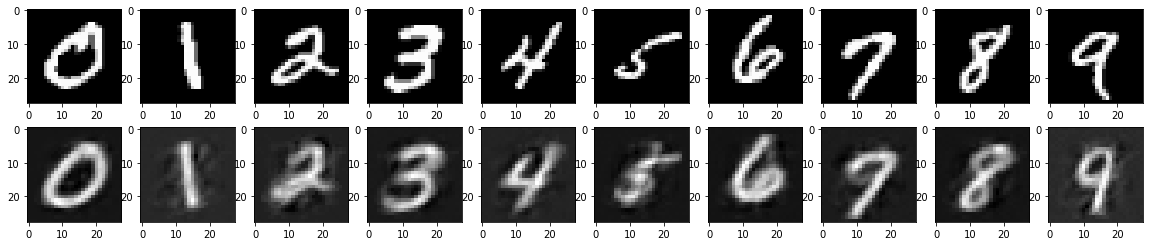

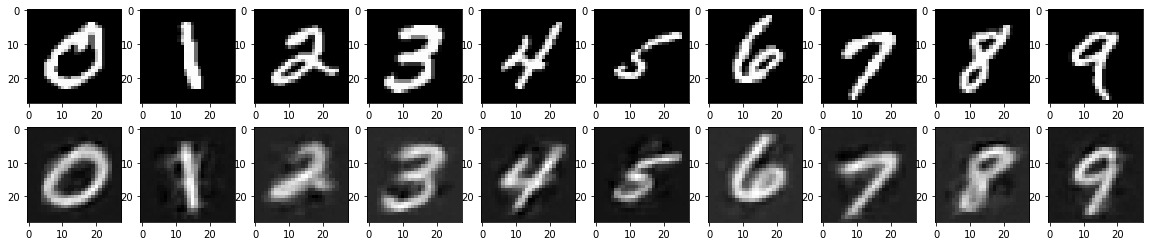

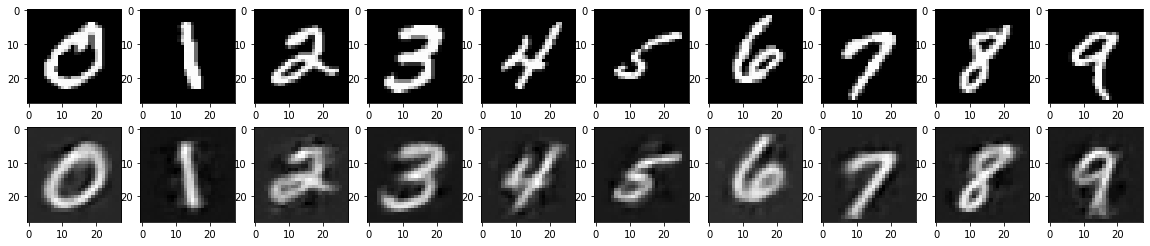

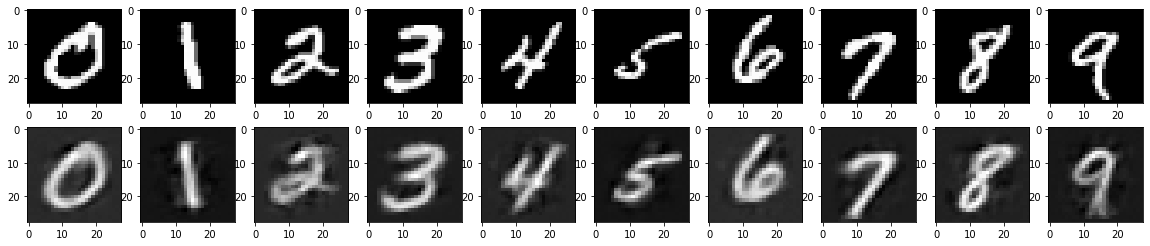

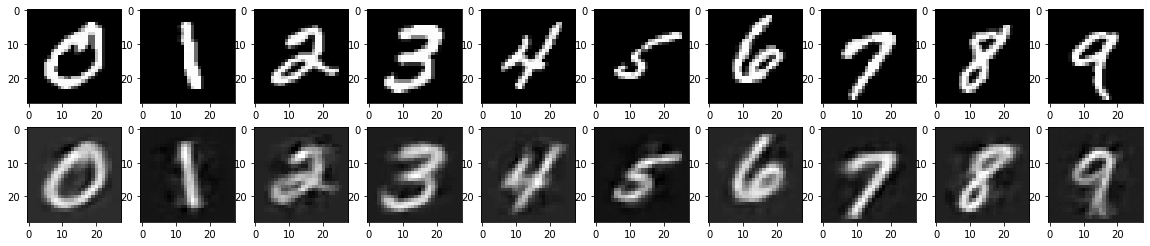

In [332]:
# Create a network
autoencoder = NN.Network(sizes=[784, 128, 128, 3, 128, 128, 784], type="regression")
total_loss_history = []
# Train the network
lrate = 0.3
epochs = 400
for _ in range(5):
    
    lrate /= 2
    epochs += 100
    
    print("#"*10 + " lrate=" + str(lrate) + " " + "#"*10)
    loss_history = autoencoder.SGD(train_in, train_in, lrate=lrate, epochs=epochs, batch_size=5)
    total_loss_history = np.concatenate([total_loss_history, loss_history[:,1]])
    test_image = train_in[test_index]
    predictions = autoencoder.FeedForward(test_image)
    show(np.concatenate([test_image, predictions]))

Text(0.5, 1.0, 'Loss History')

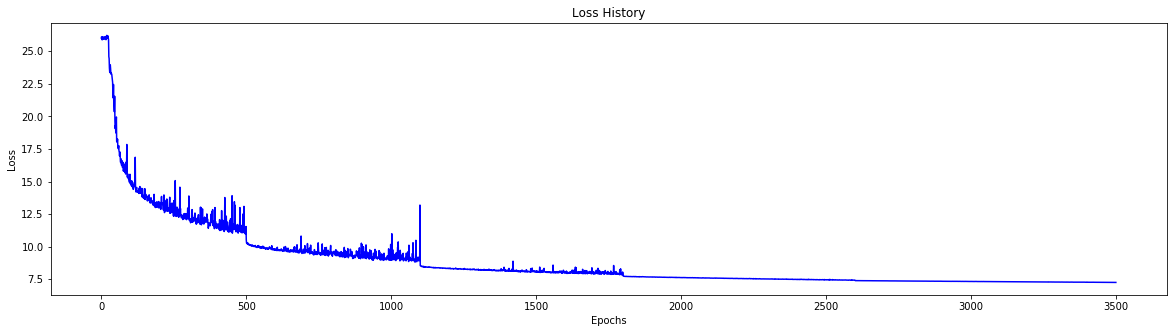

In [382]:
plt.figure(figsize=(20,5))
plt.plot(range(len(total_loss_history)), total_loss_history, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')

Save and/or load the network

In [337]:
autoencoder.Save('my_autoencoder.net')

In [4]:
autoencoder = NN.Network.Load('my_autoencoder.net')

## 1.2 View Reconstructions

<IPython.core.display.Javascript object>


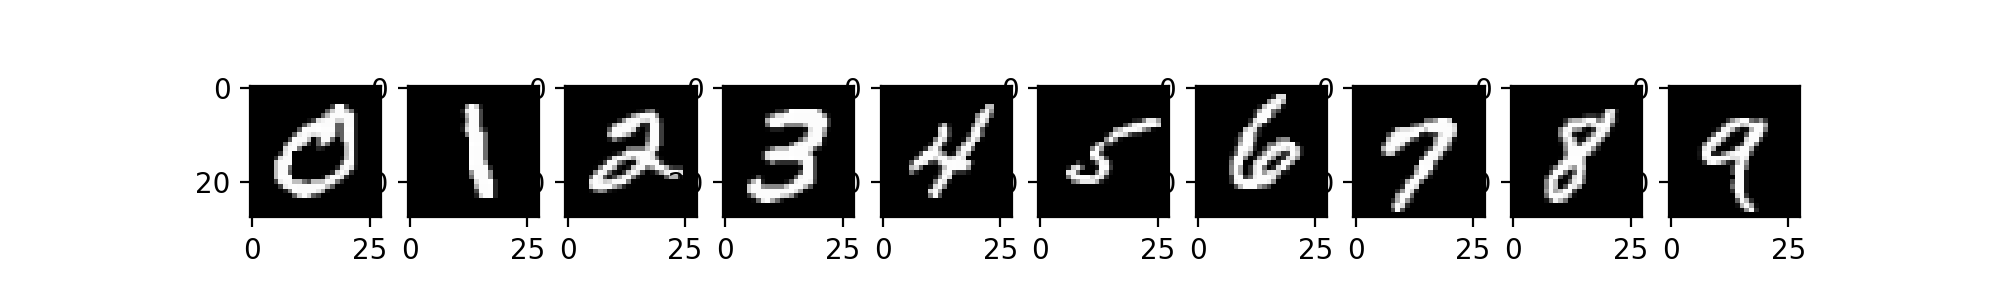

In [5]:
# Dispaly one of each digit class
# Plot both original and reconstruction
test_index = np.array([21, 6, 5, 7, 9, 11, 13, 15, 17, 4])
show(train_in[test_index])

<IPython.core.display.Javascript object>


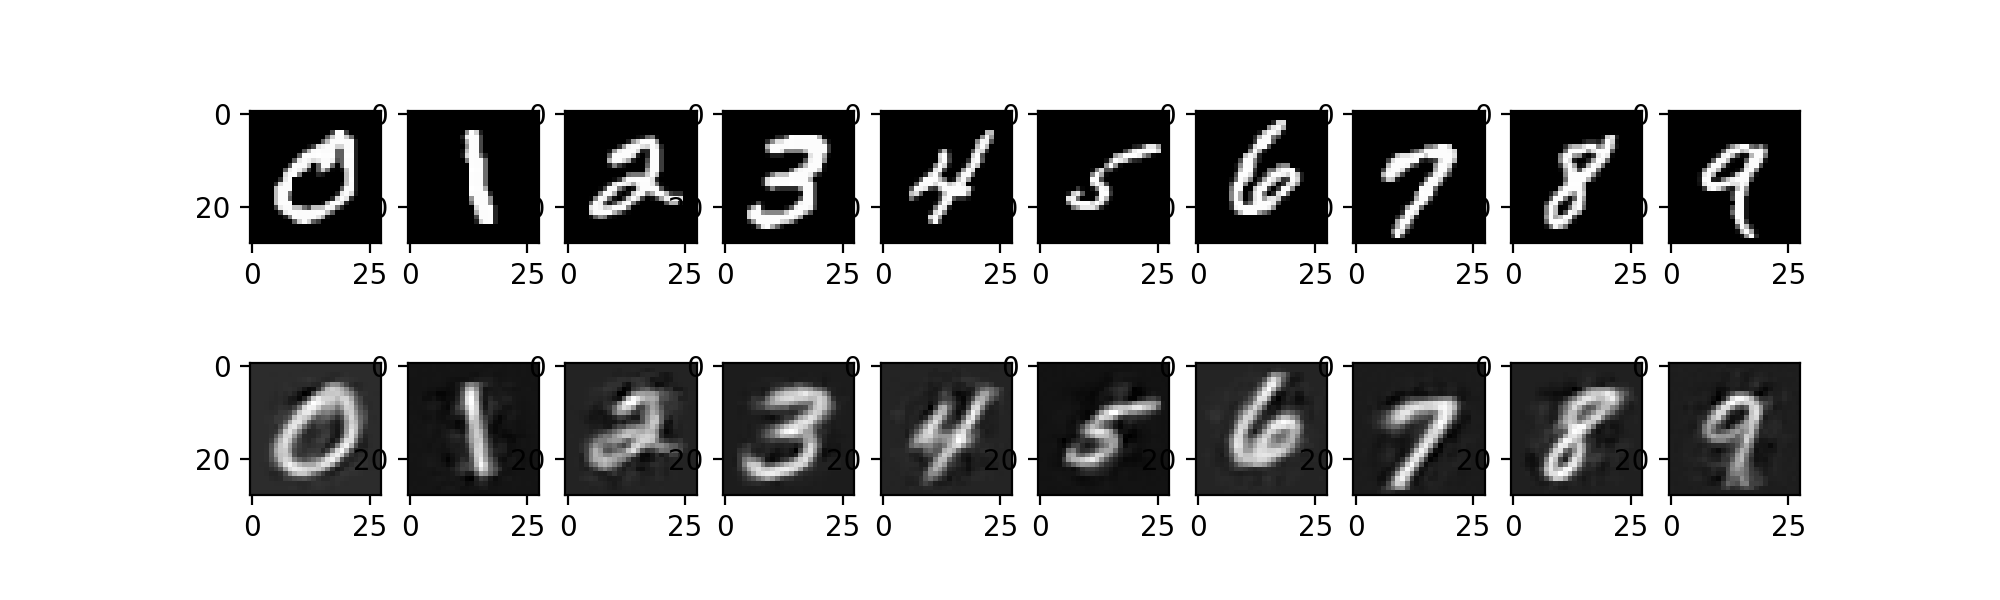

In [10]:
test_image = train_in[test_index]
predictions = autoencoder.FeedForward(test_image)
show(np.concatenate([test_image, predictions]))

## 1.3 Plot Embeddings

In [7]:
def draw3d(data, color):
    '''
        data is a 10 x N x 3 array
        color is a 10 x 1 array, representing the color
    '''
    fig = plt.figure(4, figsize=[8,8])
    fig.clf()
    ax = plt.axes(projection='3d')
    
    for d, c in zip(data, color):
        ax.scatter3D(d[:,0], d[:,1], d[:,2], color=c);
        
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [7]:
# run all training data through the network
autoencoder.FeedForward(train_in)
hidden_states = autoencoder.lyr[3].h
# convert one hot array to numerical array
numerical_train_class = np.argmax(train_class, axis=1)
masks = [numerical_train_class == i for i in range(10)]

data = [hidden_states[mask] for mask in masks]
colors = ["b", "g", "r", "c", "m", "y", "greenyellow", "black", "orange", "gray"]

<IPython.core.display.Javascript object>


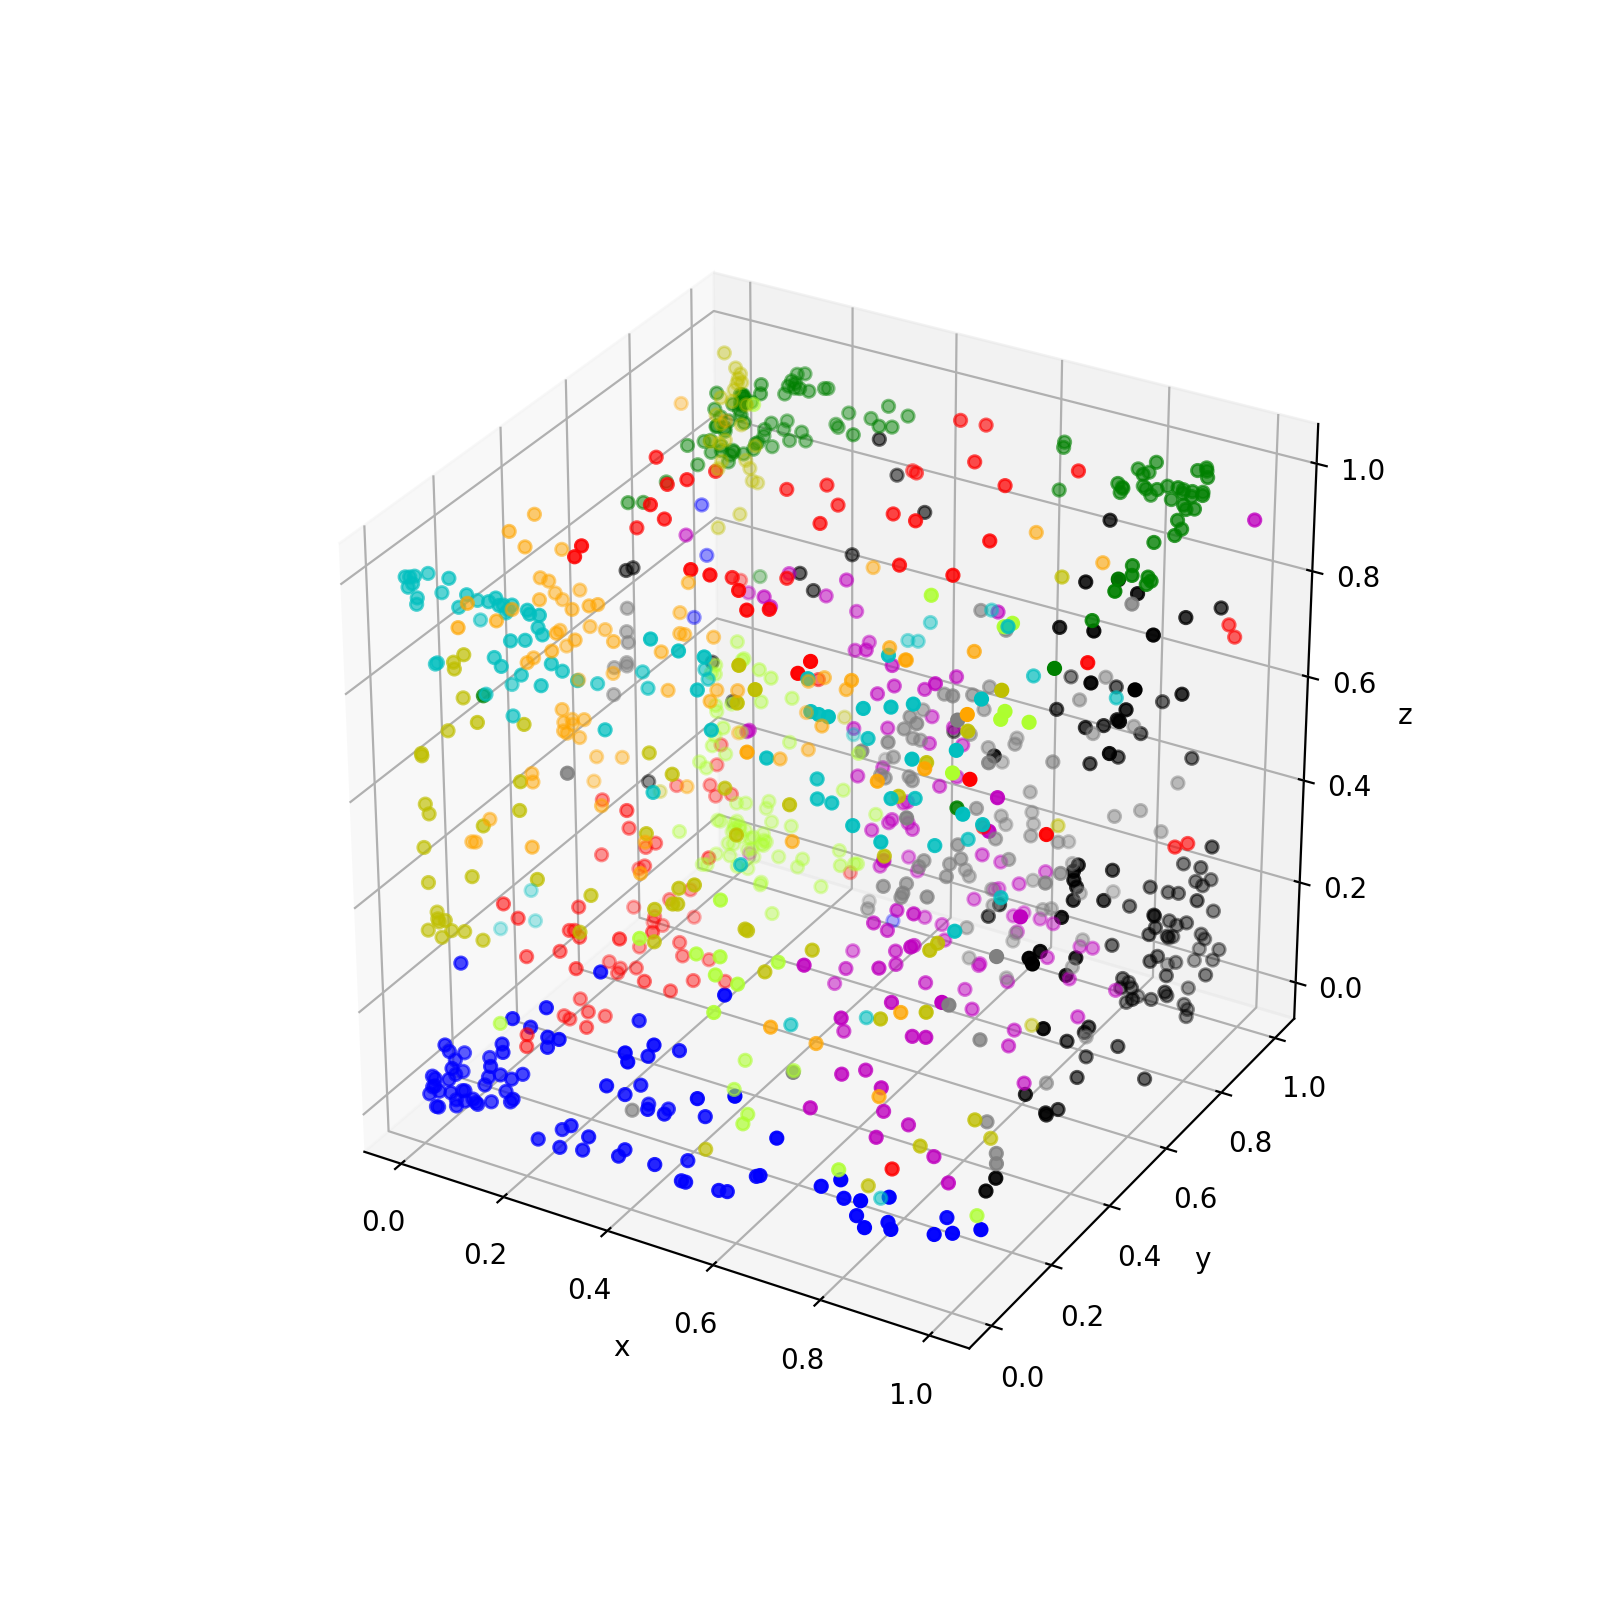

In [8]:
draw3d(data, colors)